## Visualising results

In [10]:
options(warn=0)
library(formatR)
library(stringr)
library(ggplot2)
library(gridExtra)
library(ggpubr)
library(data.table)
library(knitr)
library(kableExtra)

Data is stored in file `input_data` and resuts in `results`

In [11]:
results <- "~/Celloscope/example/results/"
input_data <-  "~/Celloscope/example/data/"

Output files stored in `results` directory:

Most importantly:
* `h_est.csv` - estimates for the proportions of considered cell types across spots: spots vs. types matrix

Additional files:
* `thetas_est.csv` -  final estimates for $\Theta$ variables
* `n_cells_output.csv`  - estimates for $N_s$
* `over_lambdas_output.csv` - estimates for $\Lambda$
* `result_p_g.csv` - estimates for $p_g$

We extract coordinates from ST data

In [12]:
C_gs <- read.csv( paste0(input_data, "C_gs.csv")  )
coor<- colnames(C_gs)[-1]

res <- str_split(coor, "x")

x <- sapply(res, function(z) z[1])
y <- as.numeric(sapply(res, function(z) z[2]))
x <- as.numeric(sapply(x,  function(z) substring(z, 2)))

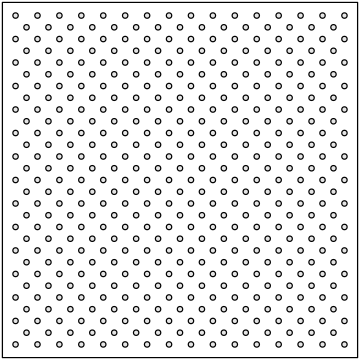

In [13]:
options(repr.plot.width = 3, repr.plot.height = 3)
par(mgp=c(0, 0,0),mar=c(0,0,0,0)+0.1)
plot(x,y, xlab="", ylab="",  pch=21, col="black", bg="gray90", xaxt="n", yaxt="n", ann = FALSE,  cex=0.6)

#### Importing results from ``.csv` files

In [14]:
# Importing h estimation results
h_est_chain01 <- t(read.csv(paste0(results, "chain01/h_est.csv"), head=FALSE))
h_est_chain02 <- t(read.csv(paste0(results, "chain02/h_est.csv"), head=FALSE))

# Averaging over chains
h <- h_est_chain01 + h_est_chain02 
h <- h/rowSums(h)

### Visualizing results

In [15]:
types <- c("T1", "T2", "T3", "T4", "DT")

# function drawing a single heatmap for a single type
one_type <- function(type_nr){
  df <- data.frame(x=x,y=y, frequency= h[,type_nr])
  df <- df[order(df$frequency), ]
  kolory <-  c("#000080",  "#ffff99",  "gold", "#cc00cc", "#cc00cc","#cc00cc", "#cc00cc")
  
  marginesy <- c(0, 0.01, -0.5, -0.5)
  ggplot(df, aes(x =x, y = y)) + geom_point(aes(color =frequency), size =2) +
    scale_color_gradientn(colors =kolory)+
    theme_bw() + labs(x = "", y="") +   ggtitle(types[type_nr])+
    theme(plot.title = element_text(size=12, hjust = 0, vjust =-2 ), legend.position = "bottom", legend.key.width=unit(1,"cm"),
          legend.background = element_rect(fill='transparent'),
          plot.margin = unit(marginesy, "cm"), axis.text.x=element_blank(), axis.ticks.x=element_blank(),
          axis.text.y=element_blank(), axis.ticks.y=element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          legend.text=element_text(size=12), legend.title=element_text(size=12), 
          legend.box="horizontal",  legend.key.size = unit(0.4, 'cm'))
}

Agg1 <- one_type(1)+ theme(legend.position="none"); Agg2 <- one_type(2)+ theme(legend.position="none");
Agg3 <- one_type(3)+ theme(legend.position="none"); Agg4 <- one_type(4)+ theme(legend.position="none"); 
Agg5 <- one_type(5)+ theme(legend.position="none"); 

### Heatmaps representing spatial composition of cell types

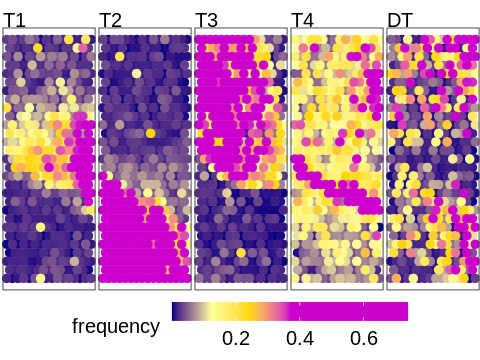

In [16]:
options(repr.plot.width = 4, repr.plot.height = 3)
ggarrange(Agg1 , Agg2 , Agg3 , Agg4, Agg5, ncol=5, nrow=1, common.legend = TRUE, legend="bottom")